# ОИАД. Лабораторная работа №2

## Входные данные
Датасет: **datasets/students_simple.csv**
Выбираются 2 столбика данных по формулам:
1)  N % 5 
2) N^2 % 5 + 5  
где $N$ - номер в списке

## 1. Расчет корреляций
1. Фехнера
2. Пирсона + доверительный интервал
3. Спирмена
4. Кенделла

## 2. Визуализация
1. Гистограммы
2. График рассеяния (scatter plot)

## 3. Уравнение регрессии
Построить уравнение регрессии по видам:
1. линейная, $y=w_1 x + w_0$
2. квадратичная, $y = w_2 x^2 + w_1 x + w_0$
3. гиперболическая, $y = \frac{w_1}{x} + w_0$ 
4. показательная, $y = w_1^x \cdot w_0$

Показать результаты на графиках

## 4. Проверка уравнения регрессии
Для наилучшего и наихудшего уравнения регрессии проверить соотвествие модели данным с помощью критерия Фишера

## 5. Выводы
Сделать вывод по каждому пункту

In [43]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

N = 27
df = pd.read_csv('students_simple.csv')


column1 = df.iloc[:, N % 5]
column2 = df.iloc[:, N ** 2 % 5 + 5] 

print(column1.name)
print(column2.name)

income
test_time


## 1. Расчет корреляций
1. Фехнера
2. Пирсона + доверительный интервал
3. Спирмена
4. Кенделла


**1. Фехнера**


$$
K = \frac{
    \sum_{i=1}^{n} 
    [sign(x_i - \overline{x}) = sign(y_i - \overline{y})] - 
    [sign(x_i - \overline{x}) \ne sign(y_i - \overline{y})]
    }{n}
$$

In [19]:
x = column1
y = column2

x_mean = x.mean()
y_mean = y.mean()

x_dev = np.sign(x - x_mean)
y_dev = np.sign(y - y_mean)
n = len(x)
K_F = (np.sum(x_dev == y_dev) - np.sum(x_dev != y_dev)) / n

print(f"Коэффициент корреляции Фехнера: K_F = {K_F:.2f}")


Коэффициент корреляции Фехнера: K_F = -0.40


**2. Пирсона + доверительный интервал**


Ковариация Пирсона:
$$
    cov = \frac{
        \sum_{i=1}^{n}
            (x_i - \overline{x}) (y_i - \overline{y}) 
    }{n-1}
$$
Корреляция Пирсона:
$$
    K = \frac{cov}{S_x S_y}
$$

где $S_x^2$ - выборочная дисперсия,
$$
    S_x^2 = \frac{\sum_{i=1}^{n} (x - \overline{x})^2}{n-1}
$$


Доверительный интервал:

$$
z = \frac12 \ln \frac{1 + K_P}{1 - K_P}, \quad
SE = \frac{1}{\sqrt{n - 3}}
$$

Границы интервала в z-преобразовании:

$$
z_\text{lower} = z - z_{0.025} \cdot SE, \quad
z_\text{upper} = z + z_{0.025} \cdot SE
$$

Обратное преобразование в r:

$$
r_\text{lower} = \frac{e^{2 z_\text{lower}} - 1}{e^{2 z_\text{lower}} + 1}, \quad
r_\text{upper} = \frac{e^{2 z_\text{upper}} - 1}{e^{2 z_\text{upper}} + 1}
$$


In [83]:
cov = (np.sum((x - x_mean) * (y - y_mean))) / (n - 1)
print(f"Ковариация (cov) = {cov:.4f}")

Sx = np.sqrt(np.sum((x - x_mean) ** 2) / (n - 1))
Sy = np.sqrt(np.sum((y - y_mean) ** 2) / (n - 1))

K_P = cov / (Sx * Sy)
print(f"Коэффициент корреляции Пирсона: K_P = {K_P:.4f}")

alpha = 0.05
z = 0.5 * np.log((1 + K_P) / (1 - K_P))
se = 1 / np.sqrt(n - 3)
z_crit = stats.norm.ppf(1 - alpha/2)
z_lower = z - z_crit * se
z_upper = z + z_crit * se

r_lower = (np.exp(2*z_lower) - 1) / (np.exp(2*z_lower) + 1)
r_upper = (np.exp(2*z_upper) - 1) / (np.exp(2*z_upper) + 1)

print(f"Доверительный интервал для K_P: [{r_lower:.4f}, {r_upper:.4f}]")

Ковариация (cov) = -225.4789
Коэффициент корреляции Пирсона: K_P = -0.5699
Доверительный интервал для K_P: [-0.8085, -0.1703]


**3. Спирмена**



Рангом $i$-го элемента выборки $x_i$ называется его порядковый номер $R(x_i)$ в упорядоченном ряду (вариационном ряду).

Корреляция Спирмана есть корреляция Пирсона над ранговыми наборами $(R(x_1)_, \dots, R(x_1))$ и $(R(y_1)_, \dots, R(y_1))$

$$
K = \frac{
    \sum_{i=1}^{n} 
    (R(x_i) - \overline{R(x)}) \cdot (R(y_i) - \overline{R(y)}) 
    }
    {
        \left[
        \left( \sum_{i=1}^{n} (R(x_i) - \overline{R(x)})^2 \right)
        \cdot
        \left( \sum_{i=1}^{n} (R(y_i) - \overline{R(y)})^2 \right)
        \right]^{\frac{1}{2}}
    } =
$$
$$
= 1 - \frac{6}{n (n-1) (n+1)} \sum_{i=1}^{n} \left( R(x_i) - R(y_i)\right)^2
$$

In [82]:
Rx = x.rank(method='average')
Ry = y.rank(method='average')

K_S = 1 - (6 * np.sum((Rx - Ry)**2)) / (n * (n - 1) * (n + 1))

print(f"Корреляция Спирмена:  {K_S:.4f}")


Корреляция Спирмена:  -0.5368


**4. Кенделла**

$$
K = 1 - \frac{4}{n (n-1)} 
\sum_{i=1}^{n-1} \sum_{j=i+1}^{n}
\left[ [x_i < x_j] \ne [y_i < y_j] \right]
$$

In [84]:
summ = 0

for i in range(n - 1):
    for j in range(i + 1, n):
        adding =  1 if ((x[i] < x[j]) != (y[i] < y[j])) else 0
        summ += adding
        

K_K = 1 - (4 * summ) / (n * (n - 1))

print(f"Коэффициент корреляции Кенделла: K_K = {K_K:.4f}")

Коэффициент корреляции Кенделла: K_K = -0.4316


Все коэффициенты < 0  
=>  Отрицательная корреляция: при увеличении x y уменьшается. Ниже графики (scatter plot и графики построенных моделей) будут тому подтверждением.

## 2. Визуализация
1. Гистограммы
2. График рассеяния (scatter plot)


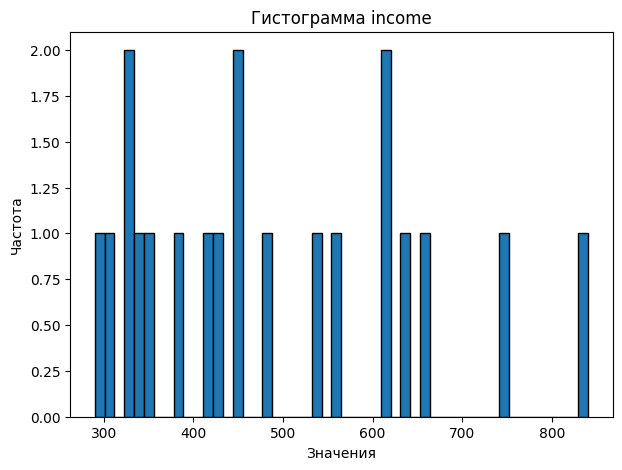

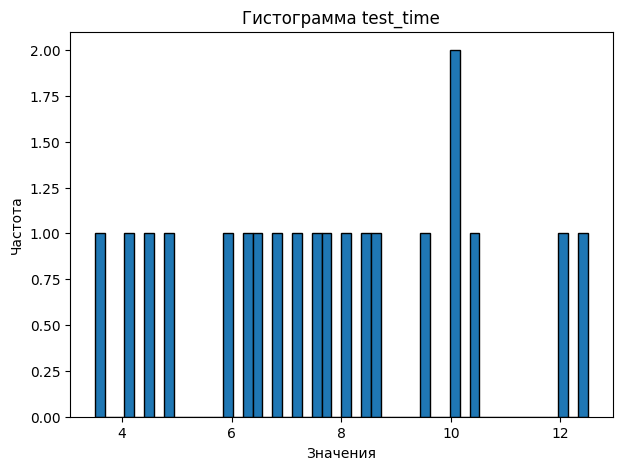

In [46]:
# Графики

# Гистограмма
plt.figure(figsize=(7, 5))
plt.hist(column1, bins=50, edgecolor='black')
plt.title('Гистограмма income')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(7, 5))
plt.hist(column2, bins=50, edgecolor='black')
plt.title('Гистограмма test_time')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.show()

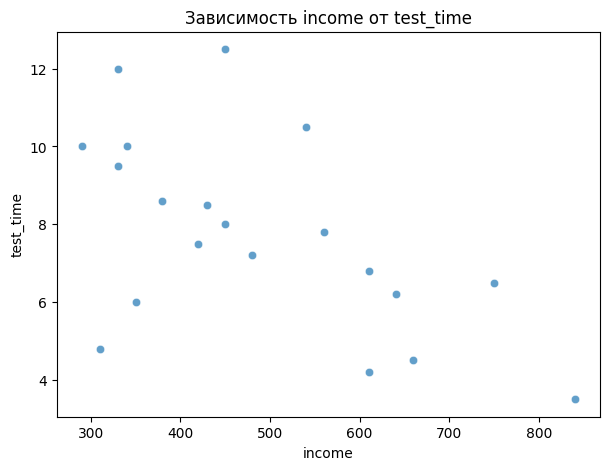

In [94]:
# График рассеяния (scatter plot)
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x=x, y=y, alpha=0.7)
plt.title("Зависимость income от test_time")
plt.xlabel("income")
plt.ylabel("test_time")
plt.show()


## 3. Уравнение регрессии
Построить уравнение регрессии по видам:
1. линейная, $y=w_1 x + w_0$
2. квадратичная, $y = w_2 x^2 + w_1 x + w_0$
3. гиперболическая, $y = \frac{w_1}{x} + w_0$ 
4. показательная, $y = w_1^x \cdot w_0$


#### Линейная модель - Метод наименьших квадратов - через аналитическое решение

Модель линейной регрессии имеет вид:

$
\hat{y_i} = w_1 x_i + w_0
$

Минимизируем сумму квадратов ошибок:

$
Q(w_0, w_1) = \sum_{i=1}^{n} (y_i - w_1 x_i - w_0)^2
$


$
\frac{\partial Q}{\partial w_0} = 0, \quad \frac{\partial Q}{\partial w_1} = 0
$

=> следующая система:

$$
\begin{cases}
n w_0 + w_1 \sum x_i = \sum y_i \\
w_0 \sum x_i + w_1 \sum x_i^2 = \sum x_i y_i
\end{cases}
$$

В матричной форме:

$$
X^T X w = X^T y
$$

где

$
X =
\begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_n
\end{bmatrix},
\quad
w =
\begin{bmatrix}
w_0 \\
w_1
\end{bmatrix},
\quad
y =
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}
$

=> решение:
$
w = (X^T X)^{-1} X^T y
$


In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def regression_MNK(X, Y):
    w = np.linalg.inv(X.T @ X) @ X.T @ Y  #    w = (X^T X)^(-1) X^T y
    return w

Линейная регрессия: y = -0.0092 * x + 12.2089


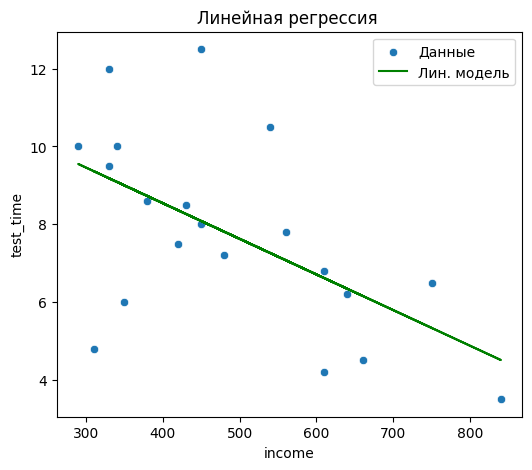

In [87]:
X = np.vstack([np.ones(len(x)), x]).T  # формируем матрицу X = [1, x]
Y = y.values.reshape(-1, 1)            # у - из вектора-строки в вектор-столбец (для матр операций)
w = regression_MNK(X, Y)
w0, w1 = w.flatten()

print(f"Линейная регрессия: y = {w1:.4f} * x + {w0:.4f}")


# Предсказания и визуализация
y_pred_lin = X @ w

plt.figure(figsize=(6, 5))
sns.scatterplot(x=x, y=y, label='Данные')
plt.plot(x, y_pred_lin, color='green', label=f'Лин. модель')
plt.xlabel(x.name)
plt.ylabel(y.name)
plt.title('Линейная регрессия ')
plt.legend()
plt.show()

#### Квадратичная модель - Метод наименьших квадратов

$
\hat{y_i} = w_2 x_i^2 + w_1 x_i + w_0
$

Суть та же, измениться лишь матрица X:

$
X =
\begin{bmatrix}
1 & x_1 & x_1^2 \\\\
1 & x_2 & x_2^2 \\\\
\vdots & \vdots & \vdots \\
1 & x_n & x_n^2
\end{bmatrix},
\quad
$

Решение:

$
w = (X^T X)^{-1} X^T y
$

Квадратичная регрессия: y = -0.0000*x^2 + 0.0097*x + 7.6017


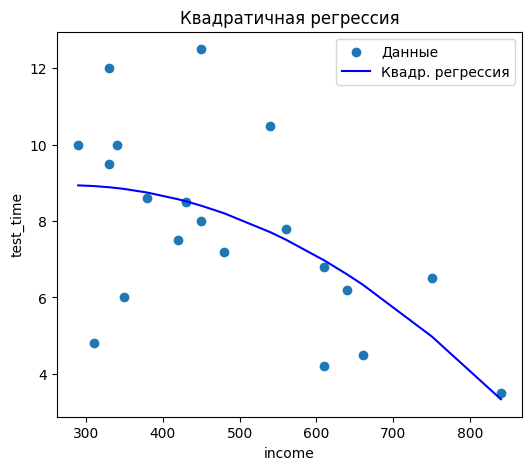

In [91]:
X = np.vstack([np.ones(len(x)), x, x**2]).T

w = regression_MNK(X, Y)

w0, w1, w2 = w.flatten()
print(f"Квадратичная регрессия: y = {w2:.4f}*x^2 + {w1:.4f}*x + {w0:.4f}")

y_pred_quad = X @ w

# Визуализация
plt.figure(figsize=(6,5))
plt.scatter(x, y, label='Данные')
plt.plot(np.sort(x), y_pred_quad[np.argsort(x)], color='blue', label='Квадр. регрессия')
plt.xlabel(column1.name)
plt.ylabel(column2.name)
plt.title("Квадратичная регрессия")
plt.legend()
plt.show()

#### Гиперболическая модель - Метод наименьших квадратов


$
\hat{y_i} = \frac{w_1}{x_i} + w_0
$

Матрица признаков:
$
X =
\begin{bmatrix}
1 & 1/x_1 \\\\
1 & 1/x_2 \\\\
\vdots & \vdots \\\\
1 & 1/x_n
\end{bmatrix},
\quad
$
Решение:
$
w = (X^T X)^{-1} X^T y
$

Гиперболическая регрессия: y = 1832.3465/x + 3.6149


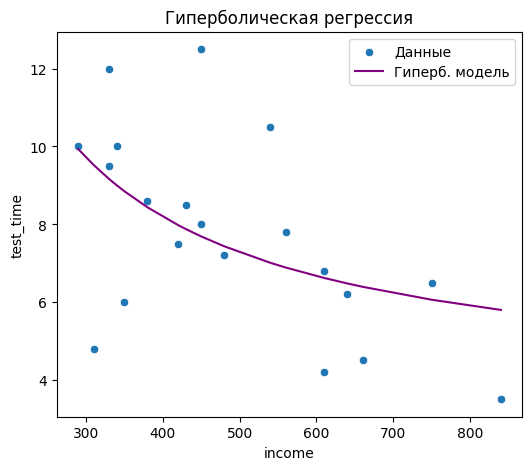

In [89]:
X = np.vstack([np.ones(len(x)), 1/x]).T
w = regression_MNK(X, Y)

w0, w1 = w.flatten()
print(f"Гиперболическая регрессия: y = {w1:.4f}/x + {w0:.4f}")

y_pred_hyp = X @ w

# Визуализация
idx = np.argsort(x)
x_sorted = x[idx]
y_pred_hyp_sort = y_pred_hyp[idx]

plt.figure(figsize=(6, 5))
sns.scatterplot(x=x, y=y, label='Данные')
plt.plot(x_sorted, y_pred_hyp_sort, color='purple', label=f'Гиперб. модель')
plt.xlabel(x.name)
plt.ylabel(y.name)
plt.title('Гиперболическая регрессия')
plt.legend()
plt.show()


#### Показательная модель - Метод наименьших квадратов

$
y_i = w_0 \cdot w_1^{x_i} \quad \Rightarrow \quad \ln(y_i) = \ln(w_0) + x_i \ln(w_1)
$

Линейная форма:

$
\hat{Y}_i = b_0 + b_1 x_i, \quad b_0 = \ln(w_0), \quad b_1 = \ln(w_1)
$

$
w_0 = e^{b_0}, \quad w_1 = e^{b_1}
$


$
X =
\begin{bmatrix}
1 & x_1 \\\\
1 & x_2 \\\\
\vdots & \vdots \\\\
1 & x_n
\end{bmatrix}, \quad
\hat{Y} = X \cdot b
$

Вектор b найдём из:

$
b = (X^T X)^{-1} X^T \\ln(y)
$


Показательная регрессия: y = 14.1216 * 0.9987^x


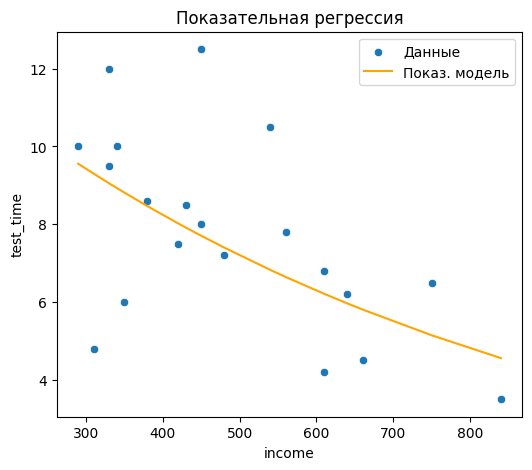

In [90]:
Y_log = np.log(y.values.reshape(-1,1))


X_exp = np.vstack([np.ones(n), x]).T

w_linlog = regression_MNK(X_exp, Y_log)
b0, b1 = w_linlog.flatten()
w0 = np.exp(b0)
w1 = np.exp(b1)
print(f"Показательная регрессия: y = {w0:.4f} * {w1:.4f}^x")


y_pred_exp = w0 * (w1 ** x)


idx = np.argsort(x)
x_sorted = x[idx]
y_pred_exp_sort = y_pred_exp[idx]

# Визуализация
plt.figure(figsize=(6,5))
sns.scatterplot(x=x, y=y, label='Данные')
plt.plot(x_sorted, y_pred_exp_sort, color='orange', label=f'Показ. модель')
plt.xlabel(column1.name)
plt.ylabel(column2.name)
plt.title('Показательная регрессия')
plt.legend()
plt.show()

Все модели вместе:

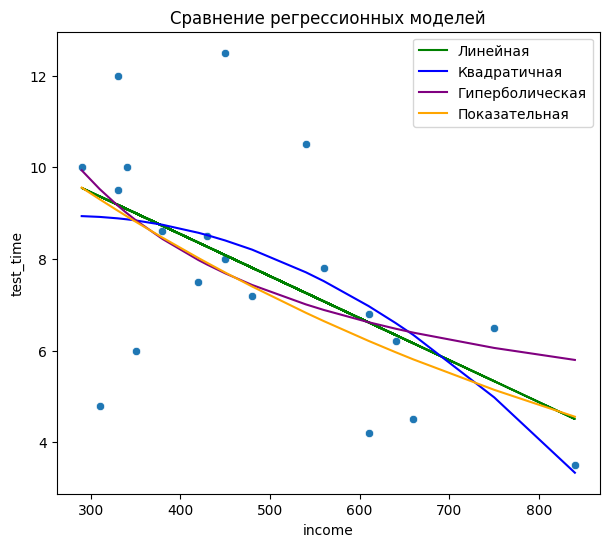

In [73]:
plt.figure(figsize=(7,6))
sns.scatterplot(x=x, y=y)

plt.plot(x, y_pred_lin, color='green', label=f'Линейная')
plt.plot(np.sort(x), y_pred_quad[np.argsort(x)], color='blue', label=f'Квадратичная')
plt.plot(x_sorted, y_pred_hyp_sort, color='purple', label=f'Гиперболическая')
plt.plot(x_sorted, y_pred_exp_sort, color='orange', label=f'Показательная')

plt.xlabel(column1.name)
plt.ylabel(column2.name)
plt.title('Сравнение регрессионных моделей')
plt.legend()
plt.show()


## 4. Проверка уравнения регрессии
Для наилучшего и наихудшего уравнения регрессии проверить соотвествие модели данных с помощью критерия Фишера


Проверим, какая модель наилучшая / наихудшая из метрик R², MSE:

In [92]:
from sklearn.metrics import r2_score, mean_squared_error

# Лин. модель
R2_lin = r2_score(y, y_pred_lin)
MSE_lin = mean_squared_error(y, y_pred_lin)
print(f"Линейная модель: R² = {R2_lin:.4f}, MSE = {MSE_lin:.4f}")

# Квадратичная
R2_quad = r2_score(y, y_pred_quad)
MSE_quad = mean_squared_error(y, y_pred_quad)
print(f"Квадратичная модель: R² = {R2_quad:.4f}, MSE = {MSE_quad:.4f}")

# Гиперб.
R2_hyp = r2_score(y, y_pred_hyp_sort)
MSE_hyp = mean_squared_error(y, y_pred_hyp_sort)
print(f"Гиперболическая модель: R² = {R2_hyp:.4f}, MSE = {MSE_hyp:.4f}")

# Показательная
R2_exp = r2_score(y, y_pred_exp_sort)
MSE_exp = mean_squared_error(y, y_pred_exp_sort)
print(f"Показательная модель: R² = {R2_exp:.4f}, MSE = {MSE_exp:.4f}")


Линейная модель: R² = 0.3248, MSE = 4.0831
Квадратичная модель: R² = 0.3542, MSE = 3.9054
Гиперболическая модель: R² = -0.2493, MSE = 7.5544
Показательная модель: R² = -0.4123, MSE = 8.5404


=> квадратичная модель имеет наименьшее значение MSE и наибольшее R², возьмём её как наилучшую.  
    показательная модель - наихудшая

Коэффициент детерминации:
$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \overline{y}_i)^2}
$

 Тест Фишера:

$
F = \frac{R^2}{1-R^2} \cdot \frac{n-k}{k-1}
$

In [93]:
import scipy.stats as stats
import numpy as np

# R²
def R2_score(y_true, y_pred):
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()
    SS_num = np.sum((y_true - y_pred)**2)
    SS_den = np.sum((y_true - np.mean(y_true))**2)
    R2 = 1 - SS_num / SS_den
    return R2


def fisher_test(R2, n, k):
    F = (R2 / (1 - R2)) * ((n - k) / (k - 1))
    return F


# Квадратичная модель (наилучшая)
R2_q = R2_score(y, y_pred_quad)
k_q = 3  # т.к w0, w1, w2
F_q = fisher_test(R2_q, n, k_q)
p_value_best = 1 - stats.f.cdf(F_q, k_q - 1, n - k_q)
print(f"Квадратичная модель (лучшая): F = {F_q:.4f}, p-value = {p_value_best:.4f}")

# Показательная модель (наихудшая)
R2_exp = R2_score(y, y_pred_exp_sort)
k_exp = 2  #  тк w0, w1
F_exp = fisher_test(R2_exp, n, k_exp)
p_value_worst = 1 - stats.f.cdf(F_exp, k_exp-1, n-k_exp)
print(f"Показательная модель (наихудшая): F = {F_exp:.4f}, p-value = {p_value_worst:.4f}")


Квадратичная модель (лучшая): F = 4.6615, p-value = 0.0243
Показательная модель (наихудшая): F = -5.2549, p-value = 1.0000


p-value — вероятность получить такое или более экстремальное значение F, если нулевая гипотеза H0 верна (т.е. все коэффициенты равны нулю).  
В качестве alpha = 0.05

##### Результаты проверки

- Квадратичная модель (наилучшая): 
  - F = 4.6615 
  - p-value = 0.0243 ;  p-value < 0.05 → отклоняем \(H_0\). Модель статистически значима, хорошо объясняет вариацию данных.  

     

- Показательная модель (наихудшая):   
  - F = -5.2549  
  - p-value =  1.0000   > 0.05 → нет оснований отклонять \(H_0\). Модель не значима, её предсказания малоинформативны.

